In [50]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd


DATA_FILE1 = 'data/data1.csv'
DATA_FILE2 = 'data/data2.csv'
OUT_DIR = 'out/'

os.makedirs(OUT_DIR, exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Load and convert datasets

from hw3.data import load_data, encode_categorical, get_training_data
    
df1 = encode_categorical(load_data(DATA_FILE1))
df2 = encode_categorical(load_data(DATA_FILE2))

X1, y1, t1 = get_training_data(df1)
X2, y2, t2 = get_training_data(df2)

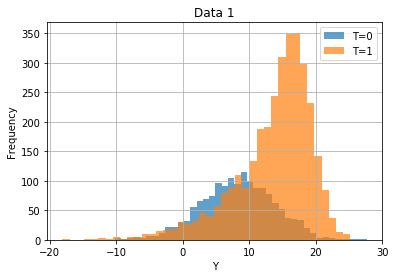

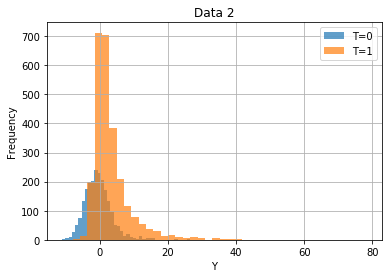

In [37]:
# Plot outcome distributions

import matplotlib.pyplot as plt

for i, df in enumerate((df1, df2)):
    plt.figure()
    groups = df.groupby('T')
    groups['Y'].plot(kind='hist', sharex=True, alpha=0.7, bins=40)
    plt.title(f'Data {i+1}')
    plt.xlabel('Y')
    plt.grid(True)
    plt.legend([f'T=0','T=1'])


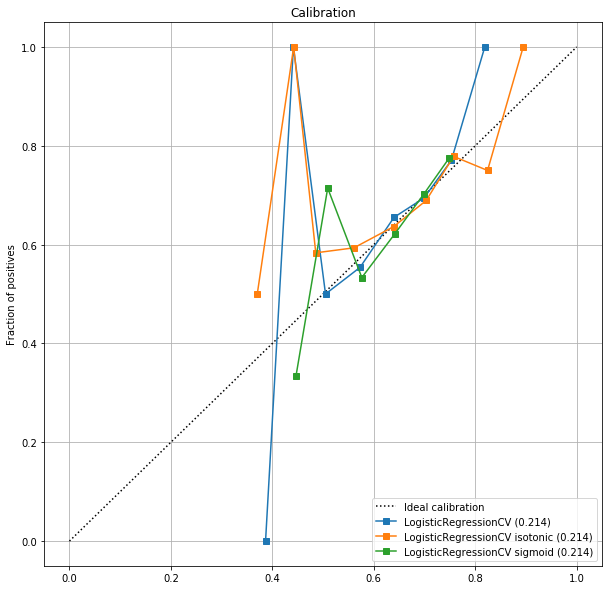

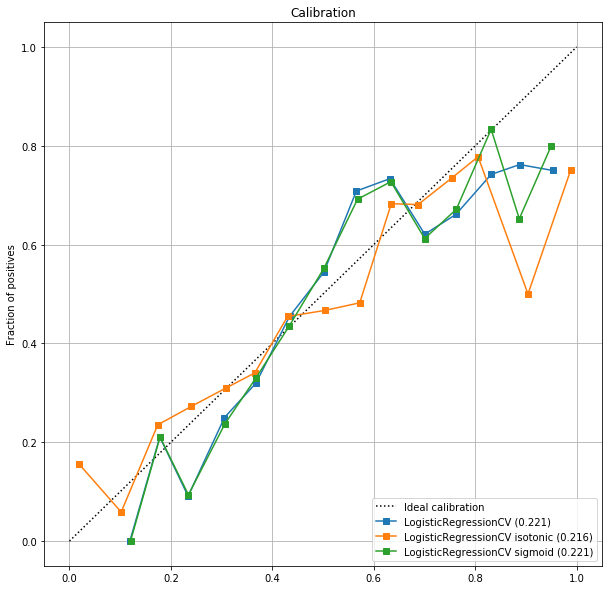

In [45]:
# Estimate propensity scores

from hw3.propensity import estimate_propensity

prop1 = estimate_propensity(X1, t1, plot=True)
prop2 = estimate_propensity(X2, t2, plot=True)

df_prop = pd.DataFrame(dict(data1=prop1, data2=prop2)).transpose()
df_prop.to_csv(f'{OUT_DIR}/models_propensity.csv', header=False)